In [37]:
from pathlib import Path
import seaborn as sns
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
dir= '/standard/BDShackathon/data/leukemia/clinical'

## Read in relevant data and put into a dictionary for easy access

In [2]:
relevant_data = ['CytogeneticAbnormalities',
                 'Diagnosis',
                 'Medications',
                 'Outcomes',
                 'PatientHistory',
                 'PatientMaster',
                 'Physical',
                 'StemCellTransplant',
                 'TumorMarker_',
                 'FlowPanel',
                 'VitalStatus',
                 'ClinicalMol']     

In [3]:
relevant_files = []
for filename in os.listdir(dir):
    if filename.endswith(".csv") and any(substring in filename for substring in relevant_data):
        relevant_files.append(filename)
        
print(relevant_files)

['20250317_UVA_TumorMarkerFlowPanel_V4.csv', '20250317_UVA_PhysicalAssessment_V4.csv', '20250317_UVA_TumorMarker_V4.csv', '20250317_UVA_CytogeneticAbnormalities_V4.csv', '20250317_UVA_Diagnosis_V4.csv', '20250317_UVA_VitalStatus_V4.csv', '20250317_UVA_ClinicalMolLinkage_V4.csv', '20250317_UVA_Medications_V4.csv', '20250317_UVA_PatientMaster_V4.csv', '20250317_UVA_PatientHistory_V4.csv', '20250317_UVA_StemCellTransplant_V4.csv', '20250317_UVA_Outcomes_V4.csv']


In [4]:
names =[]
for filename in relevant_files:
    name = filename.split('_')[2]
    names.append(name)
print(names)

['TumorMarkerFlowPanel', 'PhysicalAssessment', 'TumorMarker', 'CytogeneticAbnormalities', 'Diagnosis', 'VitalStatus', 'ClinicalMolLinkage', 'Medications', 'PatientMaster', 'PatientHistory', 'StemCellTransplant', 'Outcomes']


In [5]:

dir = '/standard/BDShackathon/data/leukemia/clinical/'

df_dict = {}
for i in range(len(relevant_files)):
    path = dir + relevant_files[i]
    df_dict[names[i]] = pd.read_csv(path)

df_dict


{'TumorMarkerFlowPanel':      AvatarKey  TumorMarkerKey FlowPanelName FlowPanelResult
 0      A006746          271432         CD117        Positive
 1      A006746          271432          CD13        Positive
 2      A006746          271432          CD33        Positive
 3      A006746          271432          CD34        Positive
 4      A006746          271432          CD45        Positive
 ...        ...             ...           ...             ...
 1804   A040113          271451          CD34        Positive
 1805   A040113          271451           CD4        Negative
 1806   A040113          271451           CD5        Negative
 1807   A040113          271451        HLA-DR        Positive
 1808   A040114          271454          CD14        Positive
 
 [1809 rows x 4 columns],
 'PhysicalAssessment':     AvatarKey AgeAtPhysicalExam           AgeAtPhysicalExamFlag  \
 0     A028337            68.334  Age derived from complete date   
 1     A029220            71.244  Age derived 

In [14]:
df_dict['TumorMarkerFlowPanel']

,AvatarKey,TumorMarkerKey,FlowPanelName,FlowPanelResult
0,A006746,271432,CD117,Positive
1,A006746,271432,CD13,Positive
2,A006746,271432,CD33,Positive
3,A006746,271432,CD34,Positive
4,A006746,271432,CD45,Positive
...,...,...,...,...
1804,A040113,271451,CD34,Positive
1805,A040113,271451,CD4,Negative
1806,A040113,271451,CD5,Negative
1807,A040113,271451,HLA-DR,Positive


## Check which datasets have multiple rows per patient

In [32]:
for dataset in df_dict:
    current_df = df_dict[dataset]
    #AvatarKey column is the first columns
    print(str(dataset))
    j = (current_df[current_df.columns[0]])
    if (j.value_counts() > 1).any():
        print(True)
    else:
        print(False)
    

TumorMarkerFlowPanel
True
PhysicalAssessment
False
TumorMarker
True
CytogeneticAbnormalities
True
Diagnosis
True
VitalStatus
False
ClinicalMolLinkage
False
Medications
True
PatientMaster
False
PatientHistory
False
StemCellTransplant
False
Outcomes
True


In [17]:
current_df

,AvatarKey,OutcomesPrimaryDiagnosisSiteCode,OutcomesPrimaryDiagnosisSite,ProgRecurInd,AgeAtProgRecur,AgeAtProgRecurFlag,YearOfProgRecur,ProgSourceFromTumorMarker,ProgSourceFromImaging,ProgSourceFromPathConfirm,...,BestRespFromClinicalRecord,AgeAtPerformStatusMostRecent,AgeAtPerformStatusMostRecentFlag,YearOfPerformStatusMostRecent,PerformStatusMostRecent,PerformStatusMostRecentScaleType,AgeAtCurrentDiseaseStatus,AgeAtCurrentDiseaseStatusFlag,YearOfCurrentDiseaseStatus,CurrentDiseaseStatus
0,A030981,C42.1,Bone marrow,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,No,No,No,...,Yes,63.534,Age derived from complete date,2016,ECOG 1 / Karnofsky 80-90%,ECOG Performance status,64.225,Age derived from complete date,2017,No Evidence of Disease
1,A030982,C42.1,Bone marrow,Progression,74.995,Age derived from complete date,2021,No,No,No,...,Yes,77.315,Age derived from complete date,2023,ECOG 1 / Karnofsky 80-90%,ECOG Performance status,77.548,Age derived from complete date,2023,Active Disease
2,A030983,C42.1,Bone marrow,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,No,No,No,...,Yes,71.047,Age derived from complete date,2018,ECOG 2 / Karnofsky 60-70%,ECOG Performance status,71.047,Age derived from complete date,2018,Active Disease
3,A030984,C42.1,Bone marrow,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,No,No,No,...,Yes,68.814,Age derived from complete date,2018,ECOG 0 / Karnofsky 100%,ECOG Performance status,68.937,Age derived from complete date,2018,Active Disease
4,A030985,C42.1,Bone marrow,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,No,No,No,...,Yes,68.518,Age derived from complete date,2018,ECOG 2 / Karnofsky 60-70%,ECOG Performance status,69.310,Age derived from complete date,2018,Active Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,A040109,C42.1,Bone marrow,Progression,56.504,Age derived from complete date,2020,No,No,No,...,Yes,58.751,Age derived from complete date,2023,ECOG 1 / Karnofsky 80-90%,ECOG Performance status,58.751,Age derived from complete date,2023,Active Disease
177,A040111,C42.1,Bone marrow,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,No,No,No,...,Yes,75.447,Age derived from complete date,2022,ECOG 2 / Karnofsky 60-70%,ECOG Performance status,75.447,Age derived from complete date,2022,No Evidence of Disease
178,A040112,C42.1,Bone marrow,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,No,No,No,...,Yes,68.014,Age derived from complete date,2021,ECOG 2 / Karnofsky 60-70%,ECOG Performance status,68.014,Age derived from complete date,2021,Active Disease
179,A040113,C42.1,Bone marrow,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,No,No,No,...,Yes,77.800,Age derived from complete date,2021,ECOG 3 / Karnofsky 40-50%,ECOG Performance status,77.778,Age derived from complete date,2021,Active Disease


## Cleaning diagnosis data

In [90]:
diagnosis = df_dict['Diagnosis']
diagnosis

,AvatarKey,AgeAtFirstContact,AgeAtFirstContactFlag,YearOfFirstContact,AgeAtDiagnosis,AgeAtDiagnosisFlag,YearOfDiagnosis,PrimaryDiagnosisSiteCode,PrimaryDiagnosisSite,Laterality,...,AgeAtOtherStagingSystemFlag,YearOfOtherStagingSystem,OtherStagingSystem,OtherStagingValue,CurrentlySeenForPrimaryOrRecurr,AgeAtPerformanceStatusAtDiagnosis,AgeAtPerformanceStatusAtDiagnosisFlag,YearOfPerformanceStatusAtDiagnosis,PerformStatusAtDiagnosis,PerformStatusAtDiagnosisScale
0,A006690,59.556,Age derived from complete date,2015,50.512,Age derived from complete date,2006,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Progressive Disease,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Performed,Unknown/Not Performed
1,A006690,59.556,Age derived from complete date,2015,59.474,Age derived from complete date,2015,C15.5,Lower third of esophagus,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Performed,Unknown/Not Performed
2,A039952,32.523,Age derived from complete date,2003,32.523,Age derived from complete date,2003,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Performed,Unknown/Not Performed
3,A039953,50.332,Age derived from complete date,2016,50.332,Age derived from complete date,2016,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Performed,Unknown/Not Performed
4,A039956,59.893,Age derived from complete date,2017,59.893,Age derived from complete date,2017,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Performed,Unknown/Not Performed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,A049229,58.622,Age derived from complete date,2019,58.622,Age derived from complete date,2019,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Performed,Unknown/Not Performed
158,A049231,38.123,Age derived from complete date,2020,38.123,Age derived from complete date,2020,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,38.167,Age derived from complete date,2020,ECOG 2 / Karnofsky 60-70%,ECOG Performance status
159,A049233,66.233,Age derived from complete date,2021,66.233,Age derived from complete date,2021,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Performed,Unknown/Not Performed
160,A049236,76.964,Age derived from complete date,2021,76.964,Age derived from complete date,2021,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,77.003,Age derived from complete date,2021,ECOG 1 / Karnofsky 80-90%,ECOG Performance status


In [37]:
column_names = diagnosis.columns.tolist()
column_names

['AvatarKey',
 'AgeAtFirstContact',
 'AgeAtFirstContactFlag',
 'YearOfFirstContact',
 'AgeAtDiagnosis',
 'AgeAtDiagnosisFlag',
 'YearOfDiagnosis',
 'PrimaryDiagnosisSiteCode',
 'PrimaryDiagnosisSite',
 'Laterality',
 'HistologyCode',
 'Histology',
 'GradeClinical',
 'GradePathological',
 'GradePostTherapy',
 'HemMaligImmunophenotype',
 'HemMaligPhase',
 'ClinTStage',
 'ClinNStage',
 'ClinMStage',
 'ClinGroupStage',
 'PathTStage',
 'PathNStage',
 'PathMStage',
 'PathGroupStage',
 'TNMClassification_aTNM',
 'TNMClassification_rTNM',
 'TNMClassification_ycTNM',
 'TNMClassification_ypTNM',
 'TNMEditionNumber',
 'AgeAtOtherStagingSystem',
 'AgeAtOtherStagingSystemFlag',
 'YearOfOtherStagingSystem',
 'OtherStagingSystem',
 'OtherStagingValue',
 'CurrentlySeenForPrimaryOrRecurr',
 'AgeAtPerformanceStatusAtDiagnosis',
 'AgeAtPerformanceStatusAtDiagnosisFlag',
 'YearOfPerformanceStatusAtDiagnosis',
 'PerformStatusAtDiagnosis',
 'PerformStatusAtDiagnosisScale']

In [97]:
columns_to_keep = ['AvatarKey',
                    'AgeAtFirstContact',
                    'AgeAtDiagnosis',
                    'HistologyCode',
                    'Histology',
                    'CurrentlySeenForPrimaryOrRecurr',]
diagnosis_cleaned =  diagnosis[columns_to_keep]
diagnosis_cleaned

,AvatarKey,AgeAtFirstContact,AgeAtDiagnosis,HistologyCode,Histology,CurrentlySeenForPrimaryOrRecurr
0,A006690,59.556,50.512,9823/3,Chronic lymphocytic leukemia/small lymphocytic...,Progressive Disease
1,A006690,59.556,59.474,8140/3,"Adenocarcinoma, NOS",Primary Diagnosis
2,A039952,32.523,32.523,9840/3,Acute erythroid leukemia,Primary Diagnosis
3,A039953,50.332,50.332,9861/3,"Acute myeloid leukemia, NOS",Primary Diagnosis
4,A039956,59.893,59.893,9811/3,"B lymphoblastic leukemia/lymphoma, NOS",Primary Diagnosis
...,...,...,...,...,...,...
157,A049229,58.622,58.622,9861/3,"Acute myeloid leukemia, NOS",Primary Diagnosis
158,A049231,38.123,38.123,9837/3,T lymphoblastic leukemia/lymphoma,Primary Diagnosis
159,A049233,66.233,66.233,9866/3,"Acute promyelocytic leukemia, t(15;17)(q22;q11...",Primary Diagnosis
160,A049236,76.964,76.964,9811/3,"B lymphoblastic leukemia/lymphoma, NOS",Primary Diagnosis


In [98]:
cancer=['leuk', 'lymp','myelo']
diagnosis_cleaned2 = diagnosis_cleaned[diagnosis_cleaned.applymap(lambda x: any(substring in str(x) for substring in cancer)).any(axis=1)]

keycounts = diagnosis_cleaned['AvatarKey'].value_counts()
multiples = keycounts[keycounts > 1]
keys = multiples.index
keys

Index(['A028334', 'A006690', 'A039969', 'A031000', 'A029225', 'A030993',
       'A008286', 'A029215', 'A006746', 'A039966', 'A049227', 'A049229',
       'A039956'],
      dtype='object', name='AvatarKey')

In [95]:
diagnosis_cleaned['Histology'].unique()

array(['Chronic lymphocytic leukemia/small lymphocytic lymphoma',
       'Adenocarcinoma, NOS', 'Acute erythroid leukemia',
       'Acute myeloid leukemia, NOS',
       'B lymphoblastic leukemia/lymphoma, NOS',
       'T-cell large granular lymphocytic leukemia',
       'Acute myeloid leukemia with multilineage dysplasia',
       'Invasive carcinoma of no special type',
       'Acute promyelocytic leukemia, t(15;17)(q22;q11-12)',
       'Diffuse large B-cell lymphoma, NOS',
       'Acute myelomonocytic leukemia', 'Myelodysplastic syndrome, NOS',
       'Precursor cell lymphoblastic leukemia, NOS',
       'Squamous cell carcinoma, NOS', 'Chronic myeloid leukemia, NOS',
       'Chronic myelogenous leukemia, BCR/ABL positive',
       'Therapy-related myeloid neoplasm',
       'Prolymphocytic leukemia, T-cell type',
       'Acute myeloid leukemia without maturation',
       'Papillary transitional cell carcinoma, non-invasive',
       'Acute myeloid leukemia with abnormal marrow eosinophil

In [99]:
inspect = diagnosis_cleaned[diagnosis_cleaned['AvatarKey'].isin(multiples.index)]
inspect

,AvatarKey,AgeAtFirstContact,AgeAtDiagnosis,HistologyCode,Histology,CurrentlySeenForPrimaryOrRecurr
0,A006690,59.556,50.512,9823/3,Chronic lymphocytic leukemia/small lymphocytic...,Progressive Disease
1,A006690,59.556,59.474,8140/3,"Adenocarcinoma, NOS",Primary Diagnosis
4,A039956,59.893,59.893,9811/3,"B lymphoblastic leukemia/lymphoma, NOS",Primary Diagnosis
5,A039956,63.710,63.710,8140/3,"Adenocarcinoma, NOS",Primary Diagnosis
10,A039966,63.189,63.038,8500/3,Invasive carcinoma of no special type,Primary Diagnosis
11,A039966,66.430,66.430,9861/3,"Acute myeloid leukemia, NOS",Primary Diagnosis
14,A039969,58.142,58.142,9823/3,Chronic lymphocytic leukemia/small lymphocytic...,Primary Diagnosis
15,A039969,58.170,58.170,9680/3,"Diffuse large B-cell lymphoma, NOS",Primary Diagnosis
39,A006746,79.899,79.112,9989/3,"Myelodysplastic syndrome, NOS",Progressive Disease
40,A006746,79.899,79.899,9895/3,Acute myeloid leukemia with multilineage dyspl...,Primary Diagnosis


In [86]:
inspect = flattened_df[flattened_df['AvatarKey'].isin(multiples.index)]
inspect

,AvatarKey,AgeAtFirstContact,AgeAtDiagnosis,HistologyCode,Histology,CurrentlySeenForPrimaryOrRecurr
45,A029225,63.326,63.326,"9823/3, 9673/3",Chronic lymphocytic leukemia/small lymphocytic...,Primary Diagnosis
102,A039969,58.156,58.156,"9823/3, 9680/3",Chronic lymphocytic leukemia/small lymphocytic...,Primary Diagnosis
130,A049229,58.622,58.622,9861/3,"Acute myeloid leukemia, NOS",Primary Diagnosis


In [78]:
flattened_df = diagnosis_cleaned.groupby('AvatarKey').agg(lambda x: ', '.join(map(str, x.unique()))).reset_index()


In [76]:
diagnosis_cleaned= diagnosis_cleaned.drop(index=156)

In [54]:
age_mapping = pd.read_csv('/standard/BDShackathon/teams/cherry_garcia/cleaned_clinical_data_csvs/age_mapping.csv')
age_mapping

,AvatarKey,Age At Specimen Collection
0,A039956,60.550
1,A039970,47.930
2,A039973,67.630
3,A039977,55.300
4,A049227,76.900
...,...,...
141,A049250,60.460
142,A039962,67.540
143,A039980,39.420
144,A040093,65.380


In [85]:
flattened_df.replace('58.142, 58.170', 58.156,inplace=True)

In [103]:
flattened_df

,AvatarKey,AgeAtFirstContact,AgeAtDiagnosis,HistologyCode,Histology,CurrentlySeenForPrimaryOrRecurr
0,A006690,59.556,50.512,9823/3,Chronic lymphocytic leukemia/small lymphocytic...,Progressive Disease
1,A006745,76.866,76.855,9867/3,Acute myelomonocytic leukemia,Primary Diagnosis
2,A006746,79.899,79.899,9895/3,Acute myeloid leukemia with multilineage dyspl...,Primary Diagnosis
3,A006747,39.871,38.753,9861/3,"Acute myeloid leukemia, NOS",Progressive Disease
4,A006748,52.581,52.581,9861/3,"Acute myeloid leukemia, NOS",Primary Diagnosis
...,...,...,...,...,...,...
140,A049246,52.767,52.767,9861/3,"Acute myeloid leukemia, NOS",Primary Diagnosis
141,A049247,79.921,79.921,9861/3,"Acute myeloid leukemia, NOS",Primary Diagnosis
142,A049248,73.082,73.082,9861/3,"Acute myeloid leukemia, NOS",Primary Diagnosis
143,A049250,60.463,60.463,9861/3,"Acute myeloid leukemia, NOS",Primary Diagnosis


In [102]:
cancer=['leuk', 'lymp','myelo']


    
# Subset the DataFrame
subset_df = diagnosis_cleaned[diagnosis_cleaned.applymap(lambda x: any(substring in str(x) for substring in cancer)).any(axis=1)]

# Display the subset DataFrame
keycounts = subset_df['AvatarKey'].value_counts()
multiples = keycounts[keycounts > 1]

inspect = subset_df[subset_df['AvatarKey'].isin(multiples.index)]
inspect


,AvatarKey,AgeAtFirstContact,AgeAtDiagnosis,HistologyCode,Histology,CurrentlySeenForPrimaryOrRecurr
14,A039969,58.142,58.142,9823/3,Chronic lymphocytic leukemia/small lymphocytic...,Primary Diagnosis
15,A039969,58.170,58.170,9680/3,"Diffuse large B-cell lymphoma, NOS",Primary Diagnosis
103,A029225,63.326,63.326,9823/3,Chronic lymphocytic leukemia/small lymphocytic...,Primary Diagnosis
104,A029225,63.326,63.326,9673/3,Mantle cell lymphoma (includes all variants: b...,Primary Diagnosis
156,A049229,50.997,50.463,9823/3,Chronic lymphocytic leukemia/small lymphocytic...,Primary Diagnosis
157,A049229,58.622,58.622,9861/3,"Acute myeloid leukemia, NOS",Primary Diagnosis


In [104]:
inspect =  flattened_df[flattened_df['AvatarKey'].isin(multiples.index)]
inspect


,AvatarKey,AgeAtFirstContact,AgeAtDiagnosis,HistologyCode,Histology,CurrentlySeenForPrimaryOrRecurr
45,A029225,63.326,63.326,"9823/3, 9673/3",Chronic lymphocytic leukemia/small lymphocytic...,Primary Diagnosis
102,A039969,58.156,58.156,"9823/3, 9680/3",Chronic lymphocytic leukemia/small lymphocytic...,Primary Diagnosis
130,A049229,58.622,58.622,9861/3,"Acute myeloid leukemia, NOS",Primary Diagnosis


In [67]:
cml = pd.read_csv('/standard/BDShackathon/teams/cherry_garcia/cleaned_clinical_data_csvs/CML_PH_PM_SCT_VS.csv')

In [68]:
cml.columns

Index(['AvatarKey', 'Site', 'Tumor/Germline', 'WES', 'WES Batch', 'RNASeq',
       'RNA Batch', 'DiseaseType', 'SpecimenSiteOfOrigin',
       'SpecimenSiteOfCollection', 'Primary/Met', 'SpecimenType',
       'SpecimenDerivativeSource', 'Histology/Behavior', 'PreservationMethod',
       '% Tumor Content', 'Age At Specimen Collection',
       'SpecimenSiteOfOriginRollUp', 'SampleAgeInDays', 'ORIENSpecimenID',
       'AgeAtLastUpdate', 'YearOfLastUpdate', 'SmokingStatus', 'AlcoholUse',
       'AnemiaDiagnosisInd', 'COPDDiagnosisInd', 'CVAStrokeDiagnosisInd',
       'DVTDiagnosisInd', 'GerdDiagnosisInd',
       'HypercholesterolemiaDiagnosisInd', 'HyperlipidemiaDiagnosisInd',
       'HypertensionDiagnosisInd', 'HypothyroidismDiagnosisInd',
       'InsulinDependentDiabetesMellitusDiagnosisInd',
       'HeartDiseaseDiagnosisInd', 'OsteoarthritisDiagnosisInd',
       'PainDiagnosisInd', 'PulmonaryEmbolismDiagnosisInd',
       'NoDrugToxicityInd', 'AgeAtOrganTransplant', 'AgeAtOrganTransplantF

In [106]:
am_keys= age_mapping['AvatarKey']
diag_keys = flattened_df['AvatarKey']

# Find values in list1 but not in list2
difference1 = list(set(am_keys) - set(diag_keys))

# Find values in list2 but not in list1
difference2 = list(set(diag_keys) - set(am_keys))

# Display the differences
print("In am but not in diag:", difference1)
print("In diag but not in am:", difference2)

In am but not in diag: ['A030984']
In diag but not in am: []


In [107]:
diagnosis

,AvatarKey,AgeAtFirstContact,AgeAtFirstContactFlag,YearOfFirstContact,AgeAtDiagnosis,AgeAtDiagnosisFlag,YearOfDiagnosis,PrimaryDiagnosisSiteCode,PrimaryDiagnosisSite,Laterality,...,AgeAtOtherStagingSystemFlag,YearOfOtherStagingSystem,OtherStagingSystem,OtherStagingValue,CurrentlySeenForPrimaryOrRecurr,AgeAtPerformanceStatusAtDiagnosis,AgeAtPerformanceStatusAtDiagnosisFlag,YearOfPerformanceStatusAtDiagnosis,PerformStatusAtDiagnosis,PerformStatusAtDiagnosisScale
0,A006690,59.556,Age derived from complete date,2015,50.512,Age derived from complete date,2006,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Progressive Disease,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Performed,Unknown/Not Performed
1,A006690,59.556,Age derived from complete date,2015,59.474,Age derived from complete date,2015,C15.5,Lower third of esophagus,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Performed,Unknown/Not Performed
2,A039952,32.523,Age derived from complete date,2003,32.523,Age derived from complete date,2003,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Performed,Unknown/Not Performed
3,A039953,50.332,Age derived from complete date,2016,50.332,Age derived from complete date,2016,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Performed,Unknown/Not Performed
4,A039956,59.893,Age derived from complete date,2017,59.893,Age derived from complete date,2017,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Performed,Unknown/Not Performed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,A049229,58.622,Age derived from complete date,2019,58.622,Age derived from complete date,2019,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Performed,Unknown/Not Performed
158,A049231,38.123,Age derived from complete date,2020,38.123,Age derived from complete date,2020,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,38.167,Age derived from complete date,2020,ECOG 2 / Karnofsky 60-70%,ECOG Performance status
159,A049233,66.233,Age derived from complete date,2021,66.233,Age derived from complete date,2021,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Performed,Unknown/Not Performed
160,A049236,76.964,Age derived from complete date,2021,76.964,Age derived from complete date,2021,C42.1,Bone marrow,Organ is not a paired site,...,Age Unknown/Not Recorded,Age Unknown/Not Recorded,Unknown/Not Applicable,Unknown/Not Applicable,Primary Diagnosis,77.003,Age derived from complete date,2021,ECOG 1 / Karnofsky 80-90%,ECOG Performance status


In [109]:
diagnosis = df_dict['Diagnosis']


columns_to_keep = ['AvatarKey',
                    'AgeAtFirstContact',
                    'AgeAtDiagnosis',
                    'HistologyCode',
                    'Histology',
                    'CurrentlySeenForPrimaryOrRecurr',]



diagnosis_cleaned =  diagnosis[columns_to_keep]
diagnosis_cleaned

diagnosis.to_csv('/standard/BDShackathon/teams/cherry_garcia/cleaned_clinical_data_csvs/diagnosis_v2.csv')

In [140]:
#cancer=['leuk', 'lymp','myel']
#diagnosis_cleaned2 = diagnosis_cleaned[diagnosis_cleaned.applymap(lambda x: any(substring in str(x) for substring in cancer)).any(axis=1)]
diagnosis.to_csv('/standard/BDShackathon/teams/cherry_garcia/cleaned_clinical_data_csvs/diagnosis_v2.csv')

In [116]:
row_to_add = diagnosis_cleaned.iloc[119]
row_to_add

AvatarKey                                                                    A030984
AgeAtFirstContact                                                             68.482
AgeAtDiagnosis                                                                68.482
HistologyCode                                                                 9985/3
Histology                          Myelodysplastic syndrome with multilineage dys...
CurrentlySeenForPrimaryOrRecurr                                    Primary Diagnosis
Name: 119, dtype: object

In [117]:
flattened_df2 = pd.concat([flattened_df, pd.DataFrame([row_to_add])], ignore_index=True)

In [119]:
flattened_df2.to_csv('/standard/BDShackathon/teams/cherry_garcia/cleaned_clinical_data_csvs/diagnosis.csv')

In [121]:
diagnosis = pd.read_csv('/standard/BDShackathon/teams/cherry_garcia/cleaned_clinical_data_csvs/diagnosis.csv')

In [123]:
len(diagnosis['Histology'].unique())
diagnosis['Histology'].unique()


array(['Chronic lymphocytic leukemia/small lymphocytic lymphoma',
       'Acute myelomonocytic leukemia',
       'Acute myeloid leukemia with multilineage dysplasia',
       'Acute myeloid leukemia, NOS',
       'Precursor cell lymphoblastic leukemia, NOS',
       'Chronic myeloid leukemia, NOS',
       'T-cell large granular lymphocytic leukemia',
       'Acute myeloid leukemia without maturation',
       'Acute myeloid leukemia with abnormal marrow eosinophils',
       'Chronic lymphocytic leukemia/small lymphocytic lymphoma, Mantle cell lymphoma (includes all variants: blastic, pleomorphic, small cell)',
       'B lymphoblastic leukemia/lymphoma, NOS',
       'Acute erythroid leukemia',
       'Acute promyelocytic leukemia, t(15;17)(q22;q11-12)',
       'Chronic lymphocytic leukemia/small lymphocytic lymphoma, Diffuse large B-cell lymphoma, NOS',
       'Chronic myelogenous leukemia, BCR/ABL positive',
       'Therapy-related myeloid neoplasm',
       'Prolymphocytic leukemia, T-cel

In [171]:
diagnosis['Histology'].value_counts()

Histology
Acute myeloid leukemia                                     61
Chronic lymphocytic leukemia/small lymphocytic lymphoma    49
B lymphoblastic leukemia/lymphoma                           9
Chronic myeloid leukemia                                    7
Other                                                       7
T-cell large granular lymphocytic leukemia                  6
Acute promyelocytic leukemia                                3
Acute myelomonocytic leukemia                               2
Precursor cell lymphoblastic leukemia                       2
Name: count, dtype: int64

In [170]:
diagnosis

,Unnamed: 0,AvatarKey,AgeAtFirstContact,AgeAtDiagnosis,HistologyCode,Histology,CurrentlySeenForPrimaryOrRecurr
0,0,A006690,59.556,50.512,9823/3,Chronic lymphocytic leukemia/small lymphocytic...,Progressive Disease
1,1,A006745,76.866,76.855,9867/3,Acute myelomonocytic leukemia,Primary Diagnosis
2,2,A006746,79.899,79.899,9895/3,Acute myeloid leukemia,Primary Diagnosis
3,3,A006747,39.871,38.753,9861/3,Acute myeloid leukemia,Progressive Disease
4,4,A006748,52.581,52.581,9861/3,Acute myeloid leukemia,Primary Diagnosis
...,...,...,...,...,...,...,...
141,141,A049247,79.921,79.921,9861/3,Acute myeloid leukemia,Primary Diagnosis
142,142,A049248,73.082,73.082,9861/3,Acute myeloid leukemia,Primary Diagnosis
143,143,A049250,60.463,60.463,9861/3,Acute myeloid leukemia,Primary Diagnosis
144,144,A049252,56.995,56.995,9861/3,Acute myeloid leukemia,Primary Diagnosis


In [165]:
diagnosis['HistologyCode'].unique()

array(['9823/3', '9867/3', '9895/3', '9861/3', '9835/3', '9863/3',
       '9831/3', '9873/3', '9871/3', '9823/3, 9673/3', '9811/3', '9840/3',
       '9866/3', '9823/3, 9680/3', '9875/3', '9920/3', '9834/3', '9837/3',
       '9985/3'], dtype=object)

In [153]:
diagnosis.replace('Acute promyelocytic leukemia, t(15;17)(q22;q11-12)','Acute promyelocytic leukemia',inplace=True)

In [174]:
subtype_counts = diagnosis['Histology'].value_counts().reset_index()
subtype_counts.columns =['Subtype','Count']
subtype_counts_below_1p= subtype_counts[subtype_counts['Count']<2]
subtype_counts_below_1p

,Subtype,Count


In [169]:
for i in subtype_counts_below_1p['Subtype']:
    print(i)
    diagnosis.replace(i,'Other',inplace=True)
    

Chronic lymphocytic leukemia/small lymphocytic lymphoma, Mantle cell lymphoma (includes all variants: blastic, pleomorphic, small cell)
Acute erythroid leukemia
Chronic lymphocytic leukemia/small lymphocytic lymphoma, Diffuse large B-cell lymphoma, NOS
Therapy-related myeloid neoplasm
Prolymphocytic leukemia, T-cell type
T lymphoblastic leukemia/lymphoma
Myelodysplastic syndrome with multilineage dysplasia


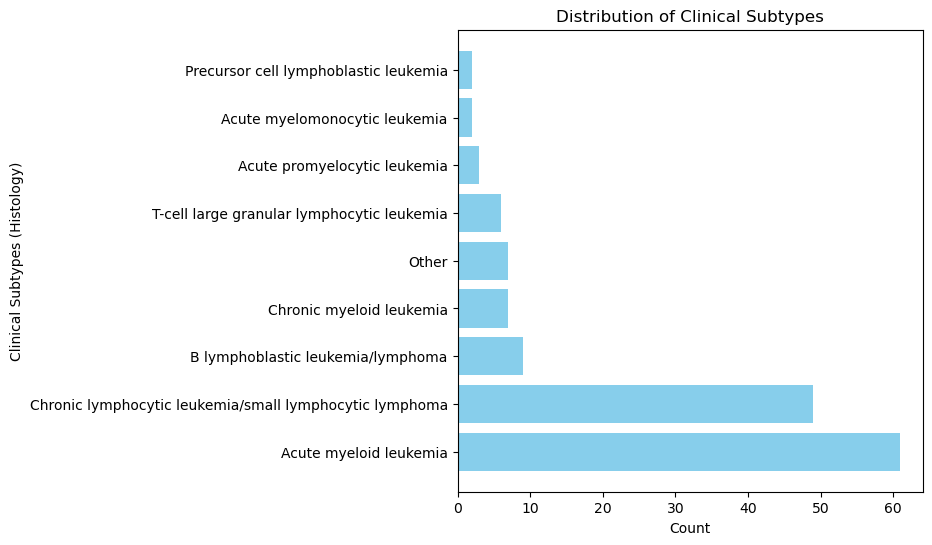

In [176]:
plt.figure(figsize=(6, 6))
plt.barh(subtype_counts['Subtype'], subtype_counts['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Clinical Subtypes (Histology)')
plt.title('Distribution of Clinical Subtypes')
plt.show()

In [28]:
diagnosis.to_csv('/standard/BDShackathon/teams/cherry_garcia/cleaned_clinical_data_csvs/diagnosis_v2.csv',index=False)

In [25]:
#diagnosis = diagnosis.iloc[:, 2:]
diagnosis = pd.read_csv('/standard/BDShackathon/teams/cherry_garcia/cleaned_clinical_data_csvs/diagnosis_v2.csv')

In [30]:
histology = diagnosis[['AvatarKey','Histology']]
histology

,AvatarKey,Histology
0,A006690,Chronic lymphocytic leukemia/small lymphocytic...
1,A006745,Acute myelomonocytic leukemia
2,A006746,Acute myeloid leukemia
3,A006747,Acute myeloid leukemia
4,A006748,Acute myeloid leukemia
...,...,...
141,A049247,Acute myeloid leukemia
142,A049248,Acute myeloid leukemia
143,A049250,Acute myeloid leukemia
144,A049252,Acute myeloid leukemia


In [6]:
umap=pd.read_csv('/standard/BDShackathon/teams/cherry_garcia/rnaseq-umap.csv')
umap.columns = ['AvatarKey','UMAP1','UMAP2']
umap

,AvatarKey,UMAP1,UMAP2
0,A039956,1.931204,4.815634
1,A039970,1.475605,5.174460
2,A039973,1.331029,3.595758
3,A039977,1.157723,4.683093
4,A049227,-1.352426,2.897019
...,...,...,...
139,A049250,-0.356274,3.831278
140,A039962,-0.832108,3.986470
141,A039980,0.271424,4.392237
142,A040093,-1.276125,3.642198


In [114]:
umap_merged = pd.merge(umap, histology, on='AvatarKey')
umap_merged

,AvatarKey,UMAP1,UMAP2,Histology
0,A039956,1.931204,4.815634,B lymphoblastic leukemia/lymphoma
1,A039970,1.475605,5.174460,Acute myeloid leukemia
2,A039973,1.331029,3.595758,Chronic lymphocytic leukemia/small lymphocytic...
3,A039977,1.157723,4.683093,Acute myeloid leukemia
4,A049227,-1.352426,2.897019,Acute myeloid leukemia
...,...,...,...,...
139,A049250,-0.356274,3.831278,Acute myeloid leukemia
140,A039962,-0.832108,3.986470,Acute myeloid leukemia
141,A039980,0.271424,4.392237,Acute promyelocytic leukemia
142,A040093,-1.276125,3.642198,Chronic lymphocytic leukemia/small lymphocytic...


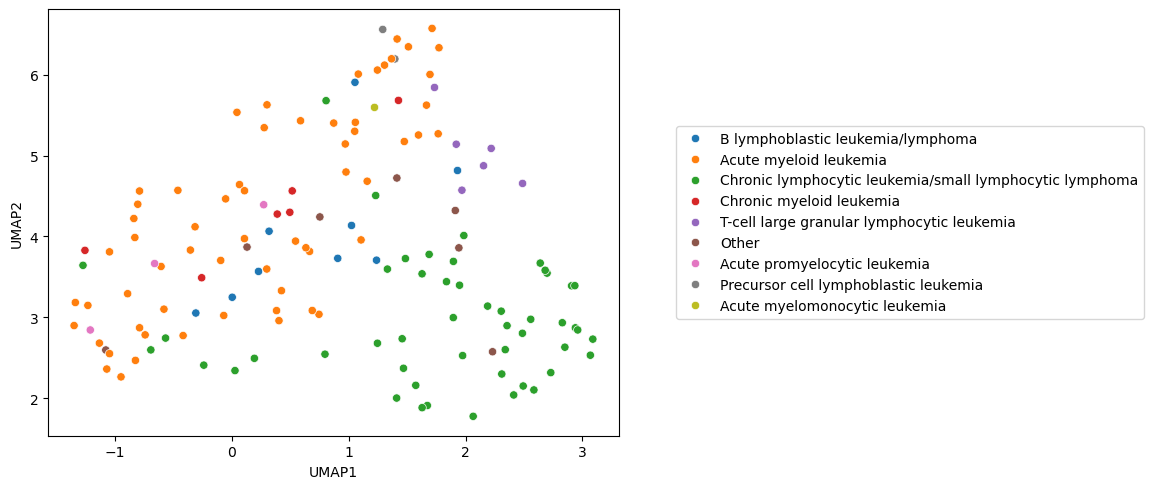

In [59]:
plt.figure(figsize=(12,5))
sns.scatterplot(
            x=umap_merged['UMAP1'],
            y=umap_merged['UMAP2'],
            hue=umap_merged['Histology'],
            palette= 'tab10',
            data=umap_merged
        )

plt.legend(bbox_to_anchor=(1.1 ,0.5), loc='center left', borderaxespad=0.)
plt.tight_layout()
plt.show()
#plt.xlabel("UMAP-1")
#plt.ylabel("UMAP-2")

In [28]:
outcomes = df_dict['Outcomes']
outcomes.columns



Index(['AvatarKey', 'OutcomesPrimaryDiagnosisSiteCode',
       'OutcomesPrimaryDiagnosisSite', 'ProgRecurInd', 'AgeAtProgRecur',
       'AgeAtProgRecurFlag', 'YearOfProgRecur', 'ProgSourceFromTumorMarker',
       'ProgSourceFromImaging', 'ProgSourceFromPathConfirm',
       'ProgSourceFromClinicalRecord', 'RecurrenceType', 'RelapseStatus',
       'DiseaseGroupBestResp', 'AMLResponse', 'CMLResponse', 'CLLResponse',
       'MDSResponse', 'JMMLResponse', 'MultipleMyelomaPCLResponse',
       'AmyloidosisResponse', 'LymphomaResponse', 'WaldenstromMacroResponse',
       'SolidTumorResponse', 'BestRespFromTumorMarker', 'BestRespFromImaging',
       'BestRespFromPathConfirm', 'BestRespFromClinicalRecord',
       'AgeAtPerformStatusMostRecent', 'AgeAtPerformStatusMostRecentFlag',
       'YearOfPerformStatusMostRecent', 'PerformStatusMostRecent',
       'PerformStatusMostRecentScaleType', 'AgeAtCurrentDiseaseStatus',
       'AgeAtCurrentDiseaseStatusFlag', 'YearOfCurrentDiseaseStatus',
       'Cu

In [29]:
outcomes = outcomes[['AvatarKey','AgeAtProgRecur',
                    'ProgRecurInd','RecurrenceType', 'RelapseStatus',
                    'DiseaseGroupBestResp', 'AMLResponse', 'CMLResponse', 'CLLResponse','AgeAtCurrentDiseaseStatus','CurrentDiseaseStatus']]
outcomes

,AvatarKey,AgeAtProgRecur,ProgRecurInd,RecurrenceType,RelapseStatus,DiseaseGroupBestResp,AMLResponse,CMLResponse,CLLResponse,AgeAtCurrentDiseaseStatus,CurrentDiseaseStatus
0,A030981,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,AML,Complete Response/Remission (CR),Unknown/Not Applicable,Unknown/Not Applicable,64.225,No Evidence of Disease
1,A030982,74.995,Progression,Unknown/Not Applicable,Unknown/Not Applicable,CLL,Unknown/Not Applicable,Unknown/Not Applicable,No Response (NR)/Stable Disease (SD),77.548,Active Disease
2,A030983,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,AML,Not Assessed/Unknown,Unknown/Not Applicable,Unknown/Not Applicable,71.047,Active Disease
3,A030984,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,MDS,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,68.937,Active Disease
4,A030985,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,AML,Not Assessed/Unknown,Unknown/Not Applicable,Unknown/Not Applicable,69.310,Active Disease
...,...,...,...,...,...,...,...,...,...,...,...
176,A040109,56.504,Progression,Unknown/Not Applicable,Unknown/Not Applicable,CML,Unknown/Not Applicable,Chronic Phase,Unknown/Not Applicable,58.751,Active Disease
177,A040111,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,AML,Complete Response/Remission (CR),Unknown/Not Applicable,Unknown/Not Applicable,75.447,No Evidence of Disease
178,A040112,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,CLL,Unknown/Not Applicable,Unknown/Not Applicable,No Response (NR)/Stable Disease (SD),68.014,Active Disease
179,A040113,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,AML,Untreated,Unknown/Not Applicable,Unknown/Not Applicable,77.778,Active Disease


In [53]:
outcomes = pd.read_csv('/standard/BDShackathon/teams/cherry_garcia/cleaned_clinical_data_csvs/outcomes.csv')

In [72]:
AML_outcomes.columns

Index(['AvatarKey', 'AgeAtProgRecur', 'ProgRecurInd', 'RecurrenceType',
       'RelapseStatus', 'DiseaseGroupBestResp', 'AMLResponse', 'CMLResponse',
       'CLLResponse', 'AgeAtCurrentDiseaseStatus', 'CurrentDiseaseStatus'],
      dtype='object')

In [73]:
AML_outcomes = outcomes[outcomes['DiseaseGroupBestResp']=='AML']
AML_current_counts = AML_outcomes['CurrentDiseaseStatus'].value_counts()
AML_recur = AML_outcomes['ProgRecurInd'].value_counts()
AML_current_counts

CurrentDiseaseStatus
Active Disease            37
No Evidence of Disease    23
Name: count, dtype: int64

In [62]:
CML_outcomes = outcomes[outcomes['DiseaseGroupBestResp']=='CML']
CML_current_counts = CML_outcomes['CurrentDiseaseStatus'].value_counts()
CML_current_counts

CurrentDiseaseStatus
Active Disease    6
Name: count, dtype: int64

In [74]:
CLL_outcomes = outcomes[outcomes['DiseaseGroupBestResp']=='CLL']
CLL_current_counts = CLL_outcomes['CurrentDiseaseStatus'].value_counts()
CLL_recur = CLL_outcomes['ProgRecurInd'].value_counts()
CLL_current_counts

CurrentDiseaseStatus
Active Disease            52
No Evidence of Disease     2
Name: count, dtype: int64

In [75]:
response_df = pd.concat([AML_recur, CLL_recur], axis=1)

response_df.columns = ['AML Recurrence', 'CLL Recurrence']
response_df = response_df.fillna(0).astype(int)

response_df

,AML Recurrence,CLL Recurrence
ProgRecurInd,,
Unknown/Not Applicable,40,41
Recurrence,14,0
Progression,6,13


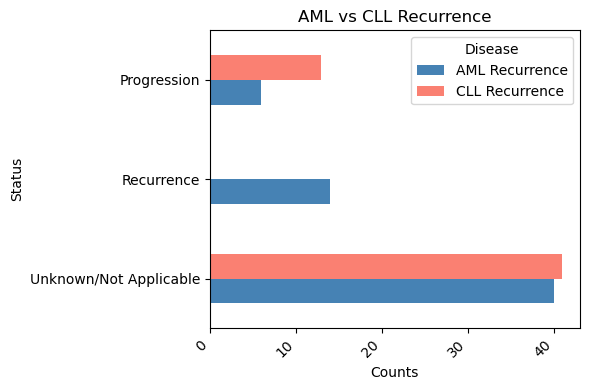

In [77]:
# Ensure index is string type for plotting
response_df.index = response_df.index.astype(str)

# Plot grouped bars
response_df.plot(kind='barh', figsize=(6, 4), color=['steelblue', 'salmon'])

plt.title('AML vs CLL Recurrence')
plt.xlabel('Counts')
plt.ylabel('Status')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Disease')
plt.tight_layout()
plt.show()

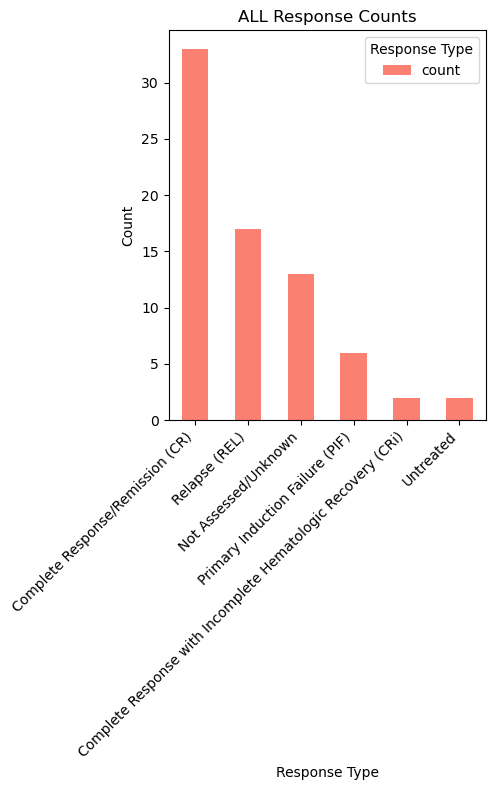

In [105]:
# Ensure index is string type for plotting
AML_counts.index = AML_counts.index.astype(str)

# Plot grouped bars
AML_counts.plot(kind='bar', figsize=(5, 8), color=['salmon'])

plt.title('ALL Response Counts')
plt.xlabel('Response Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Response Type')
plt.tight_layout()
plt.show()

In [111]:
outcomes_subset = outcomes[['AvatarKey', 'CLLResponse','AMLResponse']]
outcomes_subset

,AvatarKey,CLLResponse,AMLResponse
0,A030981,Unknown/Not Applicable,Complete Response/Remission (CR)
1,A030982,No Response (NR)/Stable Disease (SD),Unknown/Not Applicable
2,A030983,Unknown/Not Applicable,Not Assessed/Unknown
3,A030984,Unknown/Not Applicable,Unknown/Not Applicable
4,A030985,Unknown/Not Applicable,Not Assessed/Unknown
...,...,...,...
176,A040109,Unknown/Not Applicable,Unknown/Not Applicable
177,A040111,Unknown/Not Applicable,Complete Response/Remission (CR)
178,A040112,No Response (NR)/Stable Disease (SD),Unknown/Not Applicable
179,A040113,Unknown/Not Applicable,Untreated


In [116]:
umap_merged2 = pd.merge(umap_merged, outcomes_subset, on='AvatarKey')
umap_merged2

,AvatarKey,UMAP1,UMAP2,Histology,CLLResponse,AMLResponse
0,A039956,1.931204,4.815634,B lymphoblastic leukemia/lymphoma,Unknown/Not Applicable,Unknown/Not Applicable
1,A039956,1.931204,4.815634,B lymphoblastic leukemia/lymphoma,Unknown/Not Applicable,Complete Response/Remission (CR)
2,A039970,1.475605,5.174460,Acute myeloid leukemia,Unknown/Not Applicable,Complete Response/Remission (CR)
3,A039973,1.331029,3.595758,Chronic lymphocytic leukemia/small lymphocytic...,No Response (NR)/Stable Disease (SD),Unknown/Not Applicable
4,A039977,1.157723,4.683093,Acute myeloid leukemia,Unknown/Not Applicable,Complete Response/Remission (CR)
...,...,...,...,...,...,...
174,A049250,-0.356274,3.831278,Acute myeloid leukemia,Unknown/Not Applicable,Complete Response/Remission (CR)
175,A039962,-0.832108,3.986470,Acute myeloid leukemia,Unknown/Not Applicable,Relapse (REL)
176,A039980,0.271424,4.392237,Acute promyelocytic leukemia,Unknown/Not Applicable,Unknown/Not Applicable
177,A040093,-1.276125,3.642198,Chronic lymphocytic leukemia/small lymphocytic...,Progressive Disease (Prog/PD),Unknown/Not Applicable


In [118]:
umap_merged2['Histology'].unique()

array(['B lymphoblastic leukemia/lymphoma', 'Acute myeloid leukemia',
       'Chronic lymphocytic leukemia/small lymphocytic lymphoma',
       'Chronic myeloid leukemia',
       'T-cell large granular lymphocytic leukemia', 'Other',
       'Acute promyelocytic leukemia',
       'Precursor cell lymphoblastic leukemia',
       'Acute myelomonocytic leukemia'], dtype=object)

In [126]:
CLL_umap_merged = umap_merged2[umap_merged2['Histology']=='Chronic lymphocytic leukemia/small lymphocytic lymphoma']
AML_umap_merged = umap_merged2[umap_merged2['Histology']=='Acute myeloid leukemia']

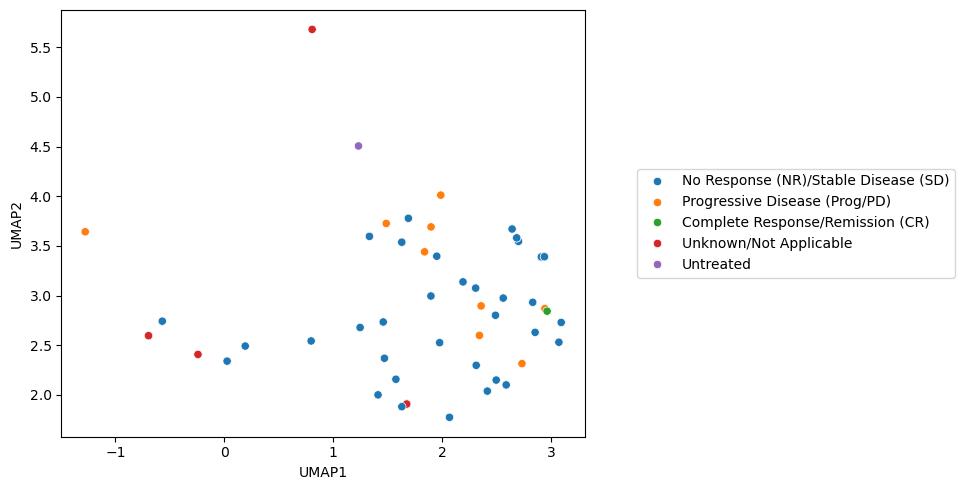

In [133]:
plt.figure(figsize=(10,5))
sns.scatterplot(
            x='UMAP1',
            y='UMAP2',
            hue='CLLResponse',
            palette= 'tab10',
            data=CLL_umap_merged
        )

plt.legend(bbox_to_anchor=(1.1 ,0.5), loc='center left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [33]:
outcomes.columns


keycounts = outcomes['AvatarKey'].value_counts()
multiples = keycounts[keycounts > 1]
multiples

inspect = outcomes[outcomes['AvatarKey'].isin(multiples.index)]
inspect

inspect.to_csv('/standard/BDShackathon/teams/cherry_garcia/KN_files/inspect_outcomes.csv')

In [25]:
outcomes['DiseaseGroupBestResp'].unique()

array(['AML', 'CLL', 'MDS', 'Solid Tumor', 'CML', 'ALL',
       'Unknown/Not Applicable', 'Lymphoma'], dtype=object)

In [26]:
outcomes['DiseaseGroupBestResp'].value_counts()

DiseaseGroupBestResp
AML                       73
CLL                       61
ALL                       17
Solid Tumor               10
CML                        7
Unknown/Not Applicable     6
Lymphoma                   4
MDS                        3
Name: count, dtype: int64

In [31]:
outcomes = outcomes[outcomes['DiseaseGroupBestResp'] != 'Solid Tumor']

In [34]:
outcomes

,AvatarKey,AgeAtProgRecur,ProgRecurInd,RecurrenceType,RelapseStatus,DiseaseGroupBestResp,AMLResponse,CMLResponse,CLLResponse,AgeAtCurrentDiseaseStatus,CurrentDiseaseStatus
0,A030981,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,AML,Complete Response/Remission (CR),Unknown/Not Applicable,Unknown/Not Applicable,64.225,No Evidence of Disease
1,A030982,74.995,Progression,Unknown/Not Applicable,Unknown/Not Applicable,CLL,Unknown/Not Applicable,Unknown/Not Applicable,No Response (NR)/Stable Disease (SD),77.548,Active Disease
2,A030983,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,AML,Not Assessed/Unknown,Unknown/Not Applicable,Unknown/Not Applicable,71.047,Active Disease
3,A030984,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,MDS,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,68.937,Active Disease
4,A030985,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,AML,Not Assessed/Unknown,Unknown/Not Applicable,Unknown/Not Applicable,69.310,Active Disease
...,...,...,...,...,...,...,...,...,...,...,...
176,A040109,56.504,Progression,Unknown/Not Applicable,Unknown/Not Applicable,CML,Unknown/Not Applicable,Chronic Phase,Unknown/Not Applicable,58.751,Active Disease
177,A040111,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,AML,Complete Response/Remission (CR),Unknown/Not Applicable,Unknown/Not Applicable,75.447,No Evidence of Disease
178,A040112,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,CLL,Unknown/Not Applicable,Unknown/Not Applicable,No Response (NR)/Stable Disease (SD),68.014,Active Disease
179,A040113,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,Unknown/Not Applicable,AML,Untreated,Unknown/Not Applicable,Unknown/Not Applicable,77.778,Active Disease


In [37]:
outcomes.columns

Index(['AvatarKey', 'AgeAtProgRecur', 'ProgRecurInd', 'RecurrenceType',
       'RelapseStatus', 'DiseaseGroupBestResp', 'AMLResponse', 'CMLResponse',
       'CLLResponse', 'AgeAtCurrentDiseaseStatus', 'CurrentDiseaseStatus'],
      dtype='object')

In [44]:
# First, sort so highest CurrentAge is on top
outcomes = outcomes.sort_values(by='AgeAtCurrentDiseaseStatus', ascending=False)

# Then drop duplicates, keeping the first (which is highest CurrentAge)
outcomes_clean = outcomes.drop_duplicates(subset=['AvatarKey', 'DiseaseGroupBestResp'], keep='first')
outcomes_clean = outcomes_clean.sort_values(by='AvatarKey')

outcomes_clean.to_csv('/standard/BDShackathon/teams/cherry_garcia/KN_files/inspect_outcomes_clean.csv')

In [47]:
keycounts = outcomes_clean['AvatarKey'].value_counts()
multiples = keycounts[keycounts > 1]
multiples


inspect = outcomes_clean[outcomes_clean['AvatarKey'].isin(multiples.index)]
inspect

inspect.to_csv('/standard/BDShackathon/teams/cherry_garcia/KN_files/inspect_outcomes3.csv',index=False)

In [52]:
outcomes_clean.to_csv('/standard/BDShackathon/teams/cherry_garcia/cleaned_clinical_data_csvs/outcomes.csv',index=False)

In [50]:
rows_to_drop=[23,46,78,107,135,137]
outcomes_clean = outcomes_clean.drop(rows_to_drop)

## Immunophenotyping

In [72]:
flowdata = pd.read_csv('/standard/BDShackathon/teams/cherry_garcia/cleaned_clinical_data_csvs/RNA_filled_flow.csv')

In [73]:
flowdata.columns

Index(['Unnamed: 0', 'AvatarKey', 'AgeAtTumorMarkerTest',
       'Age.At.Specimen.Collection', 'TimeSinceRNA', 'CD117', 'CD13', 'CD33',
       'CD34', 'CD45', 'HLA.DR', 'CD1', 'CD103', 'CD11b', 'CD11c', 'CD138',
       'CD14', 'CD19', 'CD2', 'CD20', 'CD22', 'CD23', 'CD3', 'CD38', 'CD4',
       'CD5', 'CD56', 'CD61', 'CD7', 'CD8', 'Cytoplasmic.CD3',
       'Cytoplasmic.Kappa', 'Cytoplasmic.Lambda', 'Kappa', 'Lambda', 'MDR.1',
       'Slg', 'TCR.alpha.beta', 'TCR.gamma.delta', 'ZAP.70.mutated', 'CD10'],
      dtype='object')

In [74]:
flowdata.drop(flowdata.columns[0], axis=1, inplace=True)

In [85]:
# Function to build the phenotype string
def assign_immunophenotype(row):
    phenotype = []
    for marker, value in row.items():
        if pd.isna(value):
            continue
        if value == 1.0:
            phenotype.append(f"{marker}+")
        elif value == -1.0:
            phenotype.append(f"{marker}-")
    return ' '.join(phenotype)

# Apply to each row
flowdata['Immunophenotype'] = flowdata.apply(assign_immunophenotype, axis=1)



In [79]:
flowdata = flowdata.drop(['AgeAtTumorMarkerTest','Age.At.Specimen.Collection','TimeSinceRNA'],axis = 1)

In [75]:
flowdata['AvatarKey'].value_counts()

AvatarKey
A006746    1
A008283    1
A008286    1
A008282    1
A008281    1
          ..
A032143    1
A030996    1
A030994    1
A030989    1
A039959    1
Name: count, Length: 104, dtype: int64

In [76]:
flowdata = flowdata.set_index('AvatarKey')


In [80]:
flowdata

,CD117,CD13,CD33,CD34,CD45,HLA.DR,CD1,CD103,CD11b,CD11c,...,Cytoplasmic.Kappa,Cytoplasmic.Lambda,Kappa,Lambda,MDR.1,Slg,TCR.alpha.beta,TCR.gamma.delta,ZAP.70.mutated,CD10
AvatarKey,,,,,,,,,,,,,,,,,,,,,
A006746,1,1,1,1,1,1,0,0,1,-1,...,1,1,0,0,0,0,0,1,1,1
A008283,-1,-1,-1,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
A010849,-1,0,0,0,1,0,0,0,0,1,...,-1,1,0,0,0,0,0,1,1,1
A010857,-1,0,0,0,1,0,0,0,0,1,...,-1,1,0,0,0,0,0,-1,-1,1
A010858,-1,0,0,0,0,0,0,0,0,1,...,-1,1,0,0,0,0,0,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A035447,-1,-1,-1,-1,1,1,0,0,-1,-1,...,-1,1,0,0,0,0,0,1,1,1
A039952,1,1,1,-1,1,1,0,0,-1,1,...,-1,1,0,0,0,0,0,-1,-1,1
A039953,1,1,1,1,1,1,0,0,1,1,...,1,1,0,0,0,0,0,-1,1,1


In [31]:
# Assume X is your matrix of 0s and 1s
kmeans = KMeans(n_clusters=3, random_state=0)  # you can change the number of clusters
kmeans.fit(flowdata)

# Get the cluster labels
labels = kmeans.labels_

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


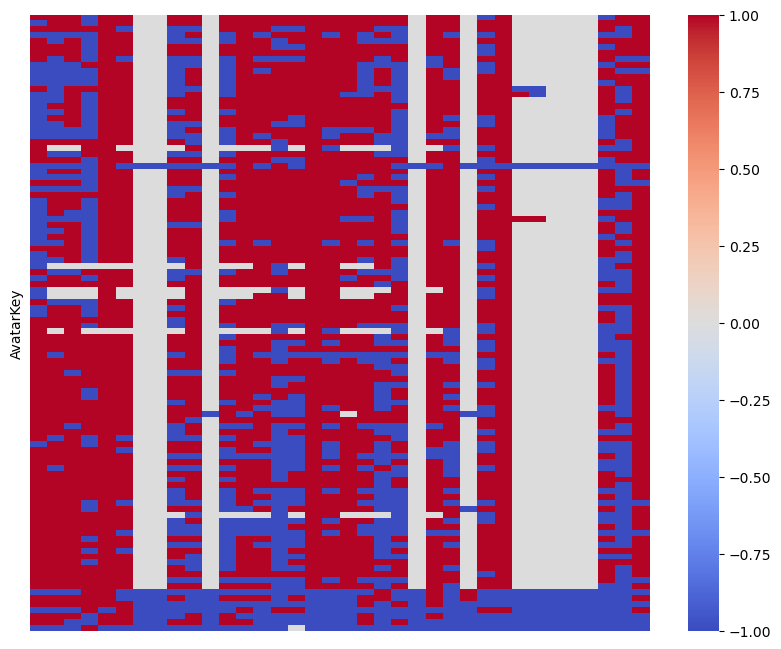

In [81]:
import numpy as np

# Assuming labels are your cluster labels
sorted_idx = np.argsort(labels)

# Reorder rows based on sorted indices
flowdata_sorted = flowdata.iloc[sorted_idx]

# Plotting (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(flowdata_sorted, cmap='coolwarm', cbar=True, xticklabels=False, yticklabels=False)
plt.show()

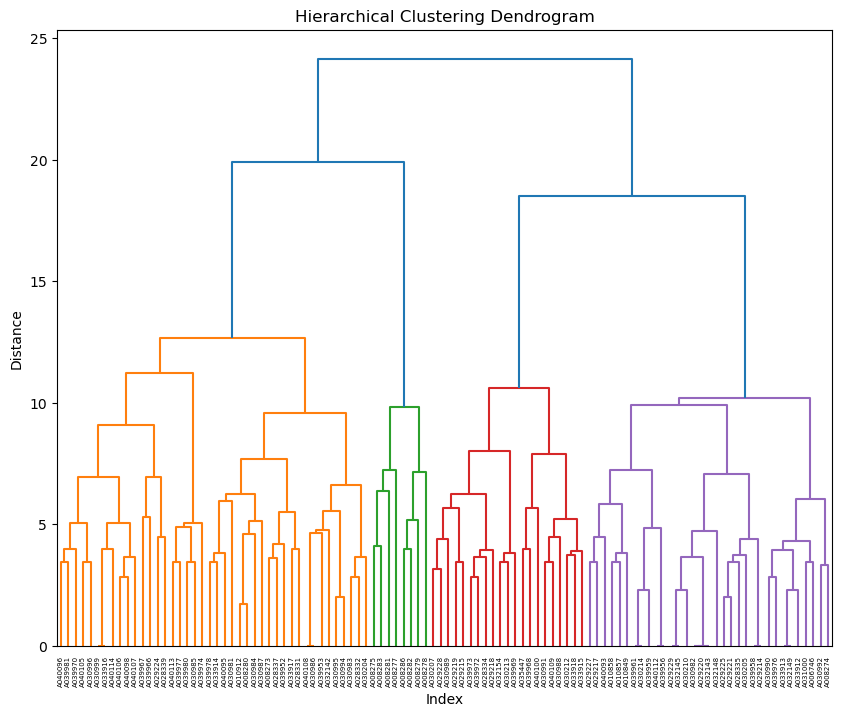

In [82]:
distance_matrix = pdist(flowdata, metric='euclidean')

# Step 2: Perform hierarchical clustering using 'ward' method
linked = sch.linkage(distance_matrix, method='ward')

# Step 3: Create the dendrogram
plt.figure(figsize=(10, 8))
sch.dendrogram(linked, labels=flowdata.index.to_list(), orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [44]:
flowdata.drop('Cluster', axis = 1, inplace = True)

In [83]:
flowdata.head()

,CD117,CD13,CD33,CD34,CD45,HLA.DR,CD1,CD103,CD11b,CD11c,...,Cytoplasmic.Kappa,Cytoplasmic.Lambda,Kappa,Lambda,MDR.1,Slg,TCR.alpha.beta,TCR.gamma.delta,ZAP.70.mutated,CD10
AvatarKey,,,,,,,,,,,,,,,,,,,,,
A006746,1,1,1,1,1,1,0,0,1,-1,...,1,1,0,0,0,0,0,1,1,1
A008283,-1,-1,-1,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
A010849,-1,0,0,0,1,0,0,0,0,1,...,-1,1,0,0,0,0,0,1,1,1
A010857,-1,0,0,0,1,0,0,0,0,1,...,-1,1,0,0,0,0,0,-1,-1,1
A010858,-1,0,0,0,0,0,0,0,0,1,...,-1,1,0,0,0,0,0,-1,1,1


In [84]:
max_d = 15
clusters = sch.fcluster(linked, max_d, criterion='distance')

# Step 4: Add cluster labels to the DataFrame
flowdata['ImmunophenotypeCluster'] = clusters

# Now `flowdata` has a new column 'Cluster' with the cluster labels
print(flowdata.head())


           CD117  CD13  CD33  CD34  CD45  HLA.DR  CD1  CD103  CD11b  CD11c  \
AvatarKey                                                                    
A006746        1     1     1     1     1       1    0      0      1     -1   
A008283       -1    -1    -1     1     1      -1   -1     -1     -1     -1   
A010849       -1     0     0     0     1       0    0      0      0      1   
A010857       -1     0     0     0     1       0    0      0      0      1   
A010858       -1     0     0     0     0       0    0      0      0      1   

           ...  Cytoplasmic.Lambda  Kappa  Lambda  MDR.1  Slg  TCR.alpha.beta  \
AvatarKey  ...                                                                  
A006746    ...                   1      0       0      0    0               0   
A008283    ...                  -1     -1      -1     -1   -1              -1   
A010849    ...                   1      0       0      0    0               0   
A010857    ...                   1      0       

In [86]:
print(flowdata.head())


           CD117  CD13  CD33  CD34  CD45  HLA.DR  CD1  CD103  CD11b  CD11c  \
AvatarKey                                                                    
A006746        1     1     1     1     1       1    0      0      1     -1   
A008283       -1    -1    -1     1     1      -1   -1     -1     -1     -1   
A010849       -1     0     0     0     1       0    0      0      0      1   
A010857       -1     0     0     0     1       0    0      0      0      1   
A010858       -1     0     0     0     0       0    0      0      0      1   

           ...  Kappa  Lambda  MDR.1  Slg  TCR.alpha.beta  TCR.gamma.delta  \
AvatarKey  ...                                                               
A006746    ...      0       0      0    0               0                1   
A008283    ...     -1      -1     -1   -1              -1               -1   
A010849    ...      0       0      0    0               0                1   
A010857    ...      0       0      0    0               0      

In [57]:
umap


,AvatarKey,UMAP1,UMAP2
0,A039956,6.334298,5.891190
1,A039970,6.650732,5.792604
2,A039973,2.354866,9.536353
3,A039977,6.836662,5.710528
4,A049227,8.029407,4.204104
...,...,...,...
141,A049250,8.147760,5.131737
142,A039962,6.847578,4.406907
143,A039980,7.067013,5.320692
144,A040093,6.924889,4.445142


In [87]:
umap = pd.read_csv('/standard/BDShackathon/teams/cherry_garcia/rnaseq-umap.csv')
umap = umap.rename(columns={'Unnamed: 0': 'AvatarKey'})

In [ ]:
umap_merged = pd.merge(umap, histology, on='AvatarKey')

In [88]:
flowdata.reset_index()


,AvatarKey,CD117,CD13,CD33,CD34,CD45,HLA.DR,CD1,CD103,CD11b,...,Kappa,Lambda,MDR.1,Slg,TCR.alpha.beta,TCR.gamma.delta,ZAP.70.mutated,CD10,ImmunophenotypeCluster,Immunophenotype
0,A006746,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,1,1,1,1,CD117+ CD13+ CD33+ CD34+ CD45+ HLA.DR+ CD11b+ ...
1,A008283,-1,-1,-1,1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,3,CD117- CD13- CD33- CD34+ CD45+ HLA.DR- CD1- CD...
2,A010849,-1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,1,CD117- CD45+ CD11c+ CD2+ CD20+ CD23+ CD3+ CD5+...
3,A010857,-1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,-1,-1,1,1,CD117- CD45+ CD11c+ CD20- CD23+ CD3+ CD56+ CD8...
4,A010858,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,1,1,1,CD117- CD11c+ CD2+ CD20- CD23+ CD3+ CD5+ CD56-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,A035447,-1,-1,-1,-1,1,1,0,0,-1,...,0,0,0,0,0,1,1,1,2,CD117- CD13- CD33- CD34- CD45+ HLA.DR+ CD11b- ...
100,A039952,1,1,1,-1,1,1,0,0,-1,...,0,0,0,0,0,-1,-1,1,4,CD117+ CD13+ CD33+ CD34- CD45+ HLA.DR+ CD11b- ...
101,A039953,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,-1,1,1,4,CD117+ CD13+ CD33+ CD34+ CD45+ HLA.DR+ CD11b+ ...
102,A039958,-1,-1,1,-1,1,1,0,0,1,...,0,0,0,0,0,1,-1,1,1,CD117- CD13- CD33+ CD34- CD45+ HLA.DR+ CD11b+ ...


In [89]:
flowdata_clusters = flowdata[['Immunophenotype','ImmunophenotypeCluster']]

In [90]:
flowdata_clusters

,Immunophenotype,ImmunophenotypeCluster
AvatarKey,,
A006746,CD117+ CD13+ CD33+ CD34+ CD45+ HLA.DR+ CD11b+ ...,1
A008283,CD117- CD13- CD33- CD34+ CD45+ HLA.DR- CD1- CD...,3
A010849,CD117- CD45+ CD11c+ CD2+ CD20+ CD23+ CD3+ CD5+...,1
A010857,CD117- CD45+ CD11c+ CD20- CD23+ CD3+ CD56+ CD8...,1
A010858,CD117- CD11c+ CD2+ CD20- CD23+ CD3+ CD5+ CD56-...,1
...,...,...
A035447,CD117- CD13- CD33- CD34- CD45+ HLA.DR+ CD11b- ...,2
A039952,CD117+ CD13+ CD33+ CD34- CD45+ HLA.DR+ CD11b- ...,4
A039953,CD117+ CD13+ CD33+ CD34+ CD45+ HLA.DR+ CD11b+ ...,4


In [92]:
flowdata_clusters.to_csv('/standard/BDShackathon/teams/cherry_garcia/cleaned_clinical_data_csvs/flowdata_clusters_rna_filled.csv',index=False)

In [93]:
umap_merged = pd.merge(umap, flowdata_clusters, on='AvatarKey')


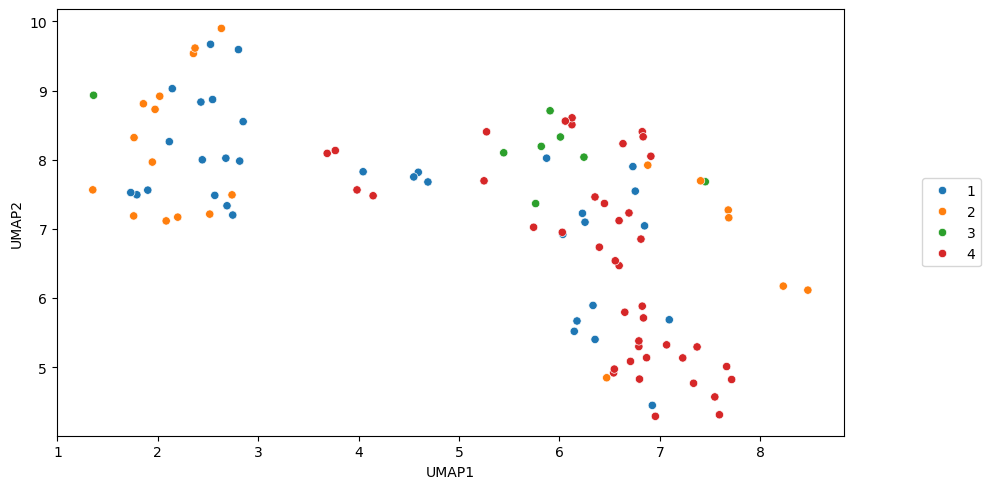

In [94]:
umap_merged
plt.figure(figsize=(10,5))
sns.scatterplot(
            x='UMAP1',
            y='UMAP2',
            hue='ImmunophenotypeCluster',
            palette= 'tab10',
            data=umap_merged
        )

plt.legend(bbox_to_anchor=(1.1 ,0.5), loc='center left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [71]:
gsva = pd.read_csv('/standard/BDShackathon/teams/cherry_garcia/gsva_scores.csv')